In [2]:
%pip install nltk jsonlines pandas textstat

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 545.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.2 MB/s eta 0:00:0000:0100:010m

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import jsonlines
import nltk
import pandas as pd
import textstat
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

# Function to calculate average word length
def avg_word_length(text):
    words = word_tokenize(text)
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(word_lengths)

# Function to calculate number of sentences
def num_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Function to calculate number of words
def num_words(text):
    words = word_tokenize(text)
    return len(words)

# Function to calculate perplexity
def calculate_perplexity(text):
    return textstat.text_standard(text, float_output=True)

# Function to extract features
def extract_features(text):
    return {
        'avg_word_length': avg_word_length(text),
        'num_sentences': num_sentences(text),
        'num_words': num_words(text),
        'perplexity': calculate_perplexity(text)
    }

# List to hold the data
data = []

# Read the jsonl file
with jsonlines.open('dataset/all_expanded_till_5372.jsonl') as reader:
    for obj in reader:
        for answer in obj['human_answers']:
            human_answers_features = extract_features(answer)
            human_answers_features['type'] = 'human_answers'
            data.append(human_answers_features)

        for answer in obj['chatgpt_answers']:
            chatgpt_answers_features = extract_features(answer)
            chatgpt_answers_features['type'] = 'chatgpt_answers'
            data.append(chatgpt_answers_features)

        chatgpt_answers_with_SDE_prompt_features = extract_features(obj['chatgpt_answers_with_SDE_prompt'])
        chatgpt_answers_with_SDE_prompt_features['type'] = 'chatgpt_answers_with_SDE_prompt'
        data.append(chatgpt_answers_with_SDE_prompt_features)

# Convert list to DataFrame
df = pd.DataFrame(data)

# Write to CSV
df.to_csv('text_features.csv', index=False)


[nltk_data] Downloading package punkt to /Users/lixiangyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


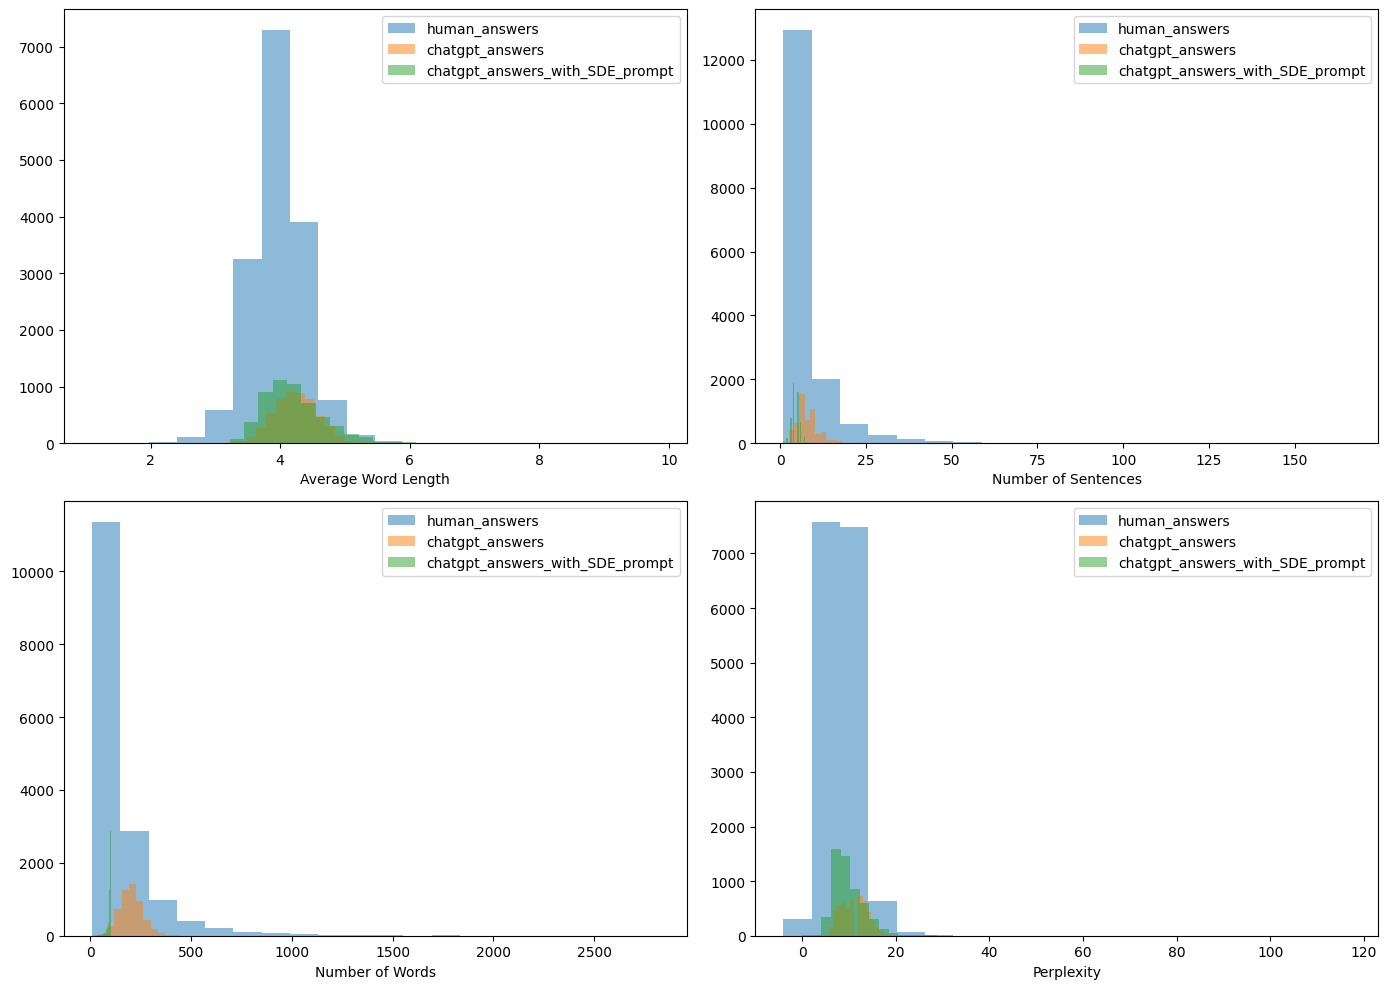

In [6]:
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV
df = pd.read_csv('text_features.csv')

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms of the numerical features
axs[0, 0].hist(df[df['type'] == 'human_answers']['avg_word_length'], bins=20, alpha=0.5, label='human_answers')
axs[0, 0].hist(df[df['type'] == 'chatgpt_answers']['avg_word_length'], bins=20, alpha=0.5, label='chatgpt_answers')
axs[0, 0].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['avg_word_length'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt')
axs[0, 0].set_xlabel('Average Word Length')
axs[0, 0].legend()

axs[0, 1].hist(df[df['type'] == 'human_answers']['num_sentences'], bins=20, alpha=0.5, label='human_answers')
axs[0, 1].hist(df[df['type'] == 'chatgpt_answers']['num_sentences'], bins=20, alpha=0.5, label='chatgpt_answers')
axs[0, 1].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['num_sentences'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt')
axs[0, 1].set_xlabel('Number of Sentences')
axs[0, 1].legend()

axs[1, 0].hist(df[df['type'] == 'human_answers']['num_words'], bins=20, alpha=0.5, label='human_answers')
axs[1, 0].hist(df[df['type'] == 'chatgpt_answers']['num_words'], bins=20, alpha=0.5, label='chatgpt_answers')
axs[1, 0].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['num_words'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt')
axs[1, 0].set_xlabel('Number of Words')
axs[1, 0].legend()

axs[1, 1].hist(df[df['type'] == 'human_answers']['perplexity'], bins=20, alpha=0.5, label='human_answers')
axs[1, 1].hist(df[df['type'] == 'chatgpt_answers']['perplexity'], bins=20, alpha=0.5, label='chatgpt_answers')
axs[1, 1].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['perplexity'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt')
axs[1, 1].set_xlabel('Perplexity')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


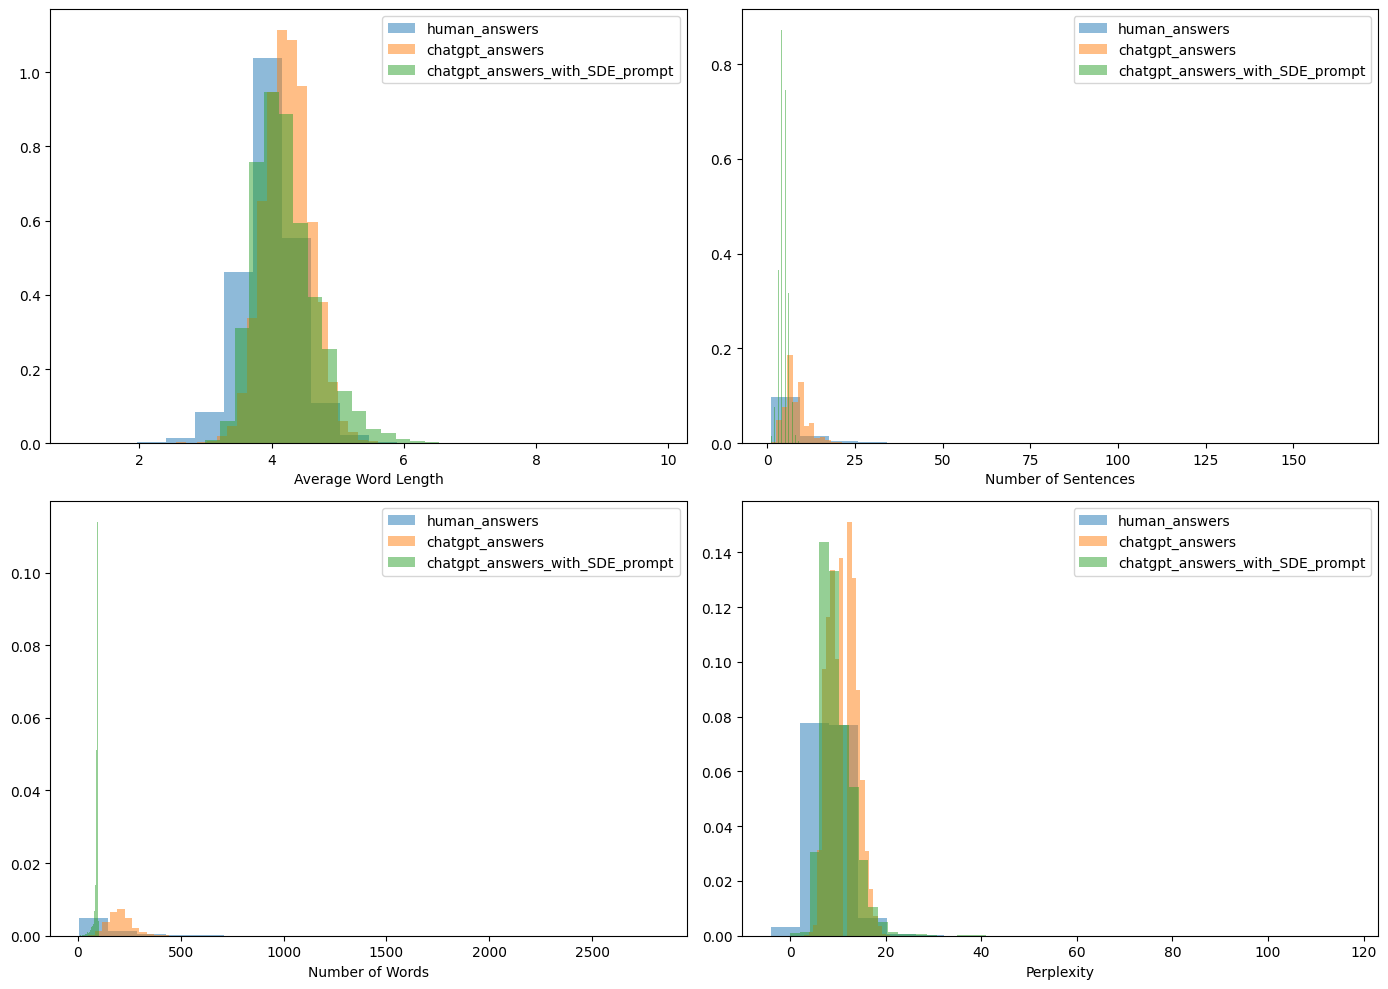

In [7]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms of the numerical features
axs[0, 0].hist(df[df['type'] == 'human_answers']['avg_word_length'], bins=20, alpha=0.5, label='human_answers', density=True)
axs[0, 0].hist(df[df['type'] == 'chatgpt_answers']['avg_word_length'], bins=20, alpha=0.5, label='chatgpt_answers', density=True)
axs[0, 0].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['avg_word_length'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt', density=True)
axs[0, 0].set_xlabel('Average Word Length')
axs[0, 0].legend()

axs[0, 1].hist(df[df['type'] == 'human_answers']['num_sentences'], bins=20, alpha=0.5, label='human_answers', density=True)
axs[0, 1].hist(df[df['type'] == 'chatgpt_answers']['num_sentences'], bins=20, alpha=0.5, label='chatgpt_answers', density=True)
axs[0, 1].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['num_sentences'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt', density=True)
axs[0, 1].set_xlabel('Number of Sentences')
axs[0, 1].legend()

axs[1, 0].hist(df[df['type'] == 'human_answers']['num_words'], bins=20, alpha=0.5, label='human_answers', density=True)
axs[1, 0].hist(df[df['type'] == 'chatgpt_answers']['num_words'], bins=20, alpha=0.5, label='chatgpt_answers', density=True)
axs[1, 0].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['num_words'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt', density=True)
axs[1, 0].set_xlabel('Number of Words')
axs[1, 0].legend()

axs[1, 1].hist(df[df['type'] == 'human_answers']['perplexity'], bins=20, alpha=0.5, label='human_answers', density=True)
axs[1, 1].hist(df[df['type'] == 'chatgpt_answers']['perplexity'], bins=20, alpha=0.5, label='chatgpt_answers', density=True)
axs[1, 1].hist(df[df['type'] == 'chatgpt_answers_with_SDE_prompt']['perplexity'], bins=20, alpha=0.5, label='chatgpt_answers_with_SDE_prompt', density=True)
axs[1, 1].set_xlabel('Perplexity')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

                                 avg_word_length  num_sentences   num_words   
type                                                                          
chatgpt_answers                         4.246190       8.096852  204.320544  \
chatgpt_answers_with_SDE_prompt         4.221930       4.465636   92.774073   
human_answers                           3.966892       6.809896  142.352145   

                                 perplexity  
type                                         
chatgpt_answers                   10.958838  
chatgpt_answers_with_SDE_prompt   10.062581  
human_answers                      8.824300  


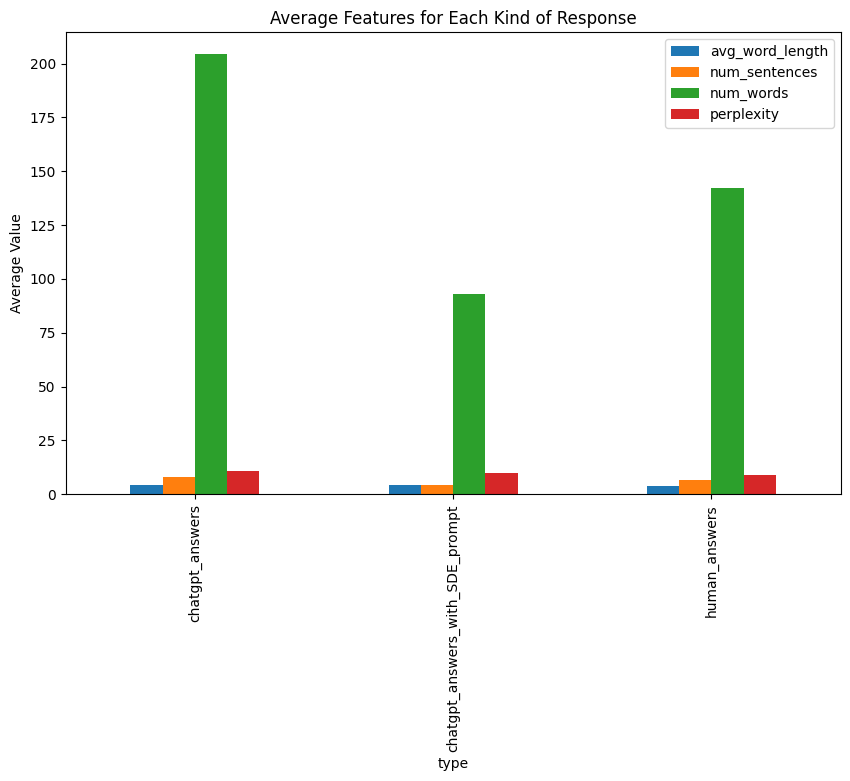

In [8]:
# Calculate the average of each feature for each kind of response
average_features = df.groupby('type').mean()

# Print the average features
print(average_features)

# Visualize the average features
average_features.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Value')
plt.title('Average Features for Each Kind of Response')
plt.show()


type             chatgpt_answers  chatgpt_answers_with_SDE_prompt   
avg_word_length         4.246190                         4.221930  \
num_sentences           8.096852                         4.465636   
num_words             204.320544                        92.774073   
perplexity             10.958838                        10.062581   

type             human_answers  
avg_word_length       3.966892  
num_sentences         6.809896  
num_words           142.352145  
perplexity            8.824300  


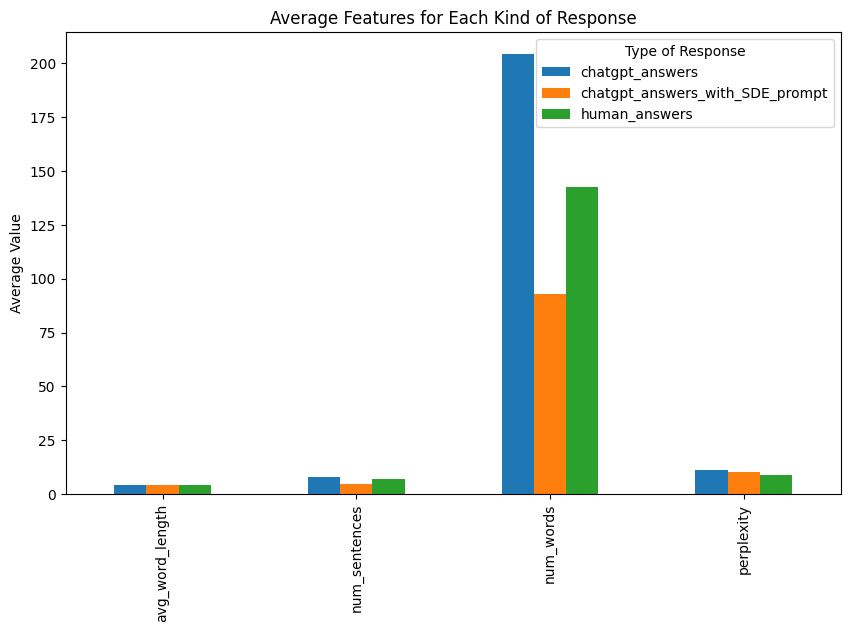

In [9]:
# Transpose the DataFrame to swap rows and columns
average_features_transposed = average_features.transpose()

# Print the transposed DataFrame
print(average_features_transposed)

# Visualize the transposed DataFrame
average_features_transposed.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Value')
plt.title('Average Features for Each Kind of Response')
plt.legend(title='Type of Response')
plt.show()

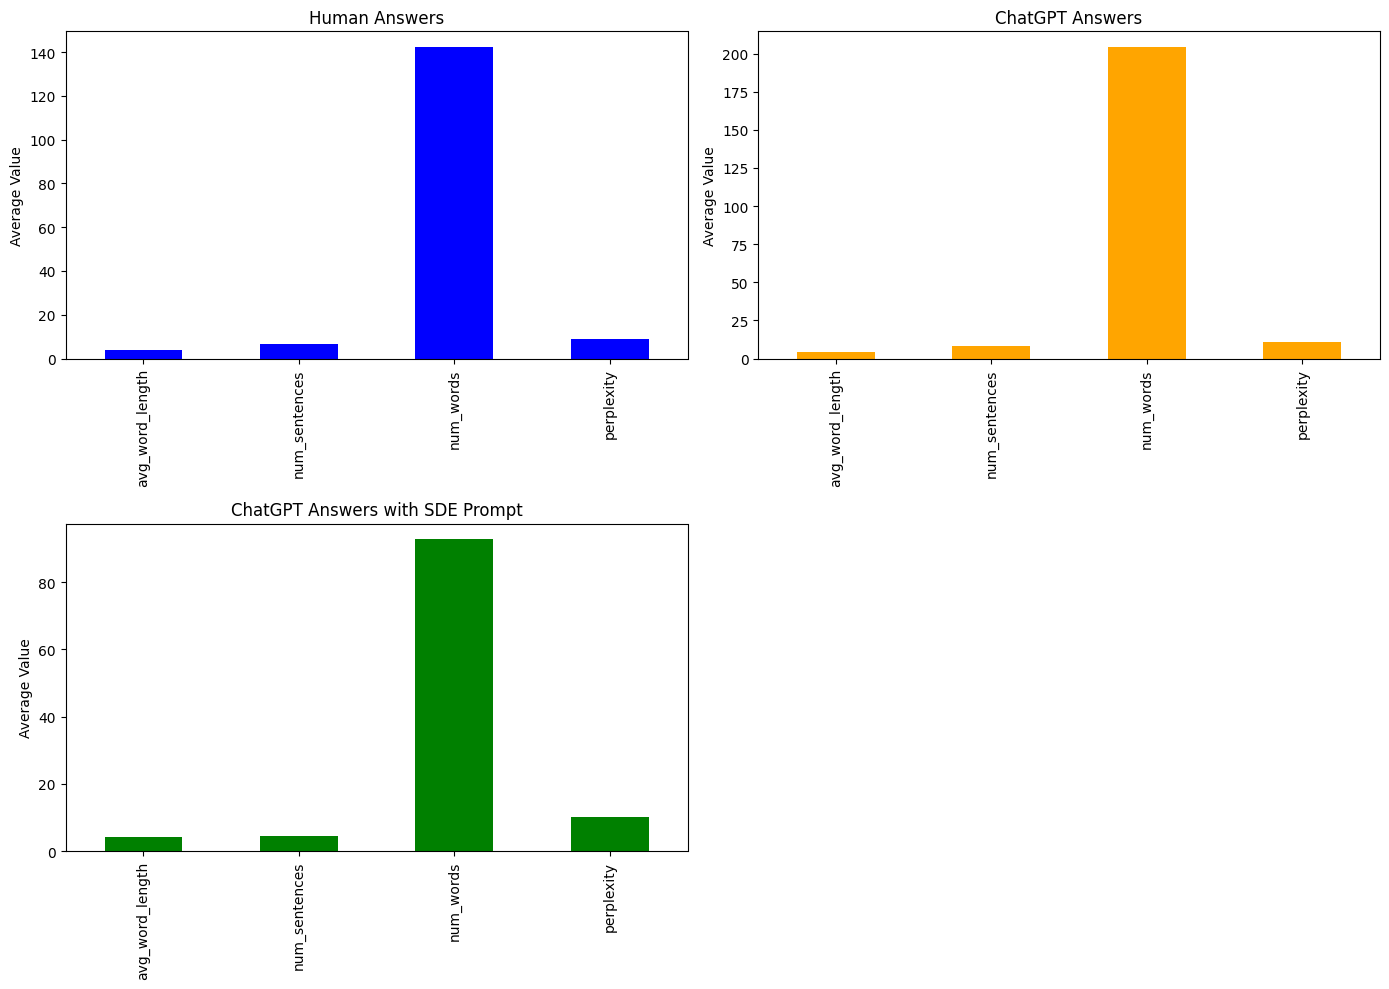

In [10]:
# Transpose the DataFrame to swap rows and columns
average_features_transposed = average_features.transpose()

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the average features in separate subplots
average_features_transposed['human_answers'].plot(kind='bar', ax=axs[0, 0], color='blue', title='Human Answers')
average_features_transposed['chatgpt_answers'].plot(kind='bar', ax=axs[0, 1], color='orange', title='ChatGPT Answers')
average_features_transposed['chatgpt_answers_with_SDE_prompt'].plot(kind='bar', ax=axs[1, 0], color='green', title='ChatGPT Answers with SDE Prompt')

# Remove the fourth subplot if it's not used
fig.delaxes(axs[1, 1])

# Add y-axis label and adjust layout
for ax in axs.flat:
    ax.set(ylabel='Average Value')
plt.tight_layout()
plt.show()


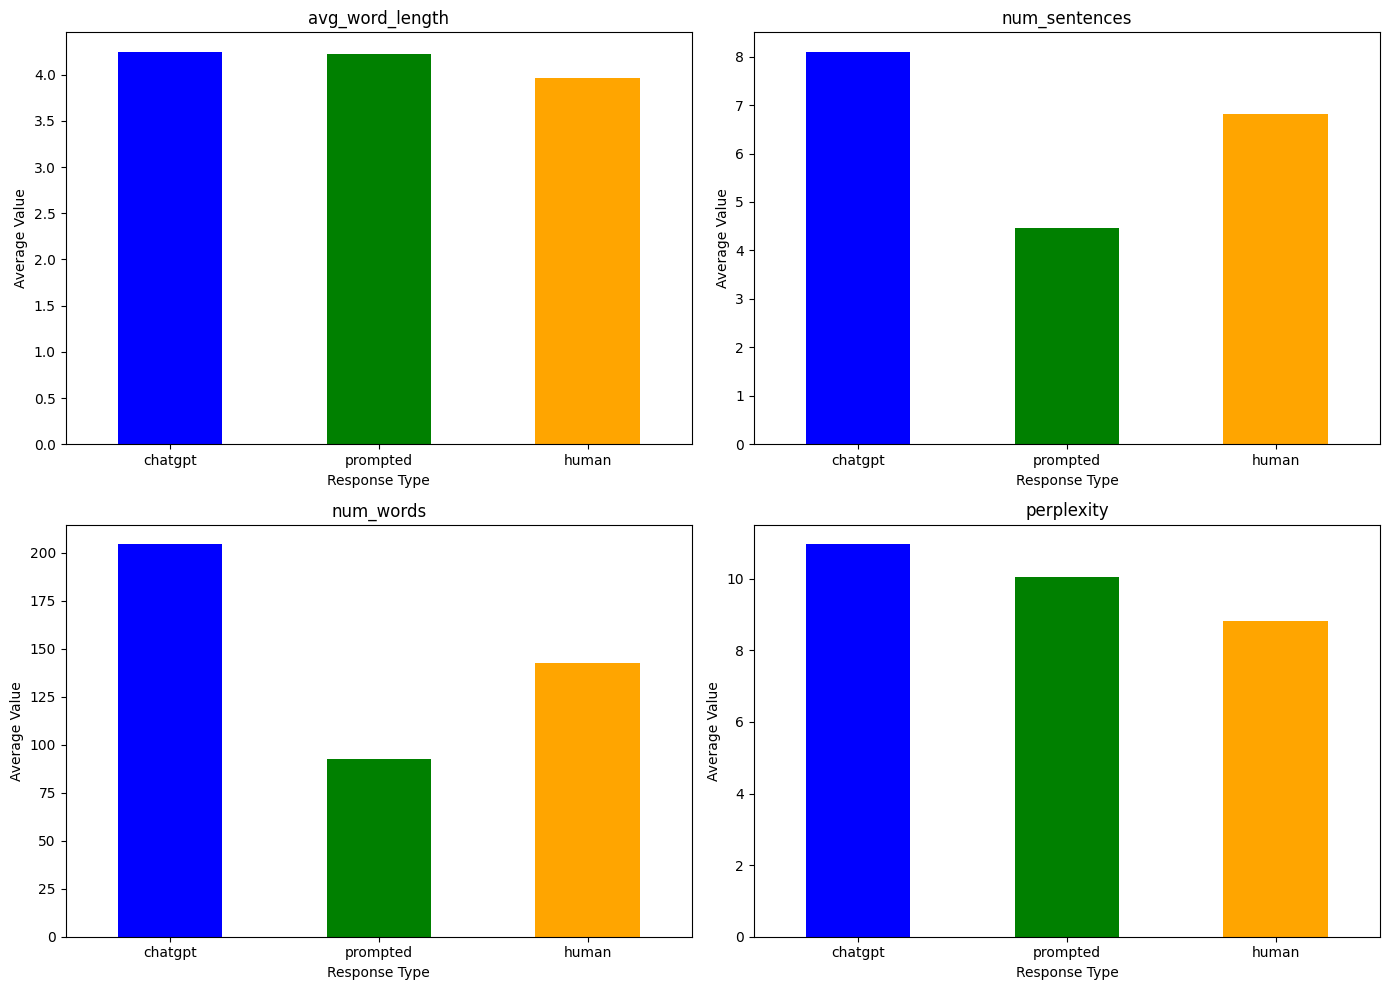

In [17]:
# Transpose the DataFrame to swap rows and columns
average_features_transposed = average_features.transpose()

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

features = average_features_transposed.columns
axs = axs.flatten()  # flatten the 2D array to 1D

x_labels = ["chatgpt", "prompted", "human"]
colors = ["blue", "green", "orange"]

for idx, feature in enumerate(average_features_transposed.index):
    average_features_transposed.loc[feature].plot(kind='bar', ax=axs[idx], title=feature, color=colors)
    axs[idx].set_xticklabels(x_labels, rotation=0)  # set new x-labels
    axs[idx].set_xlabel("Response Type")  # set x-axis title

# Remove the fourth subplot if it's not used
if len(average_features_transposed.index) < len(axs):
    fig.delaxes(axs[len(average_features_transposed.index)])

# Add y-axis label and adjust layout
for ax in axs:
    ax.set(ylabel='Average Value')

plt.tight_layout()
plt.show()
